<a href="https://colab.research.google.com/github/Caspian-Aiyanna/Harin-Portfolio/blob/main/EO_summer_school_2025_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import [scikit-map](https://github.com/openlandmap/scikit-map) and other packages

In [ ]:
!pip install git+https://github.com/openlandmap/scikit-map.git@eo-summer-school

  Cloning https://github.com/openlandmap/scikit-map.git (to revision eo-summer-school) to /tmp/pip-req-build-jd9h6y5o
  Running command git clone --filter=blob:none --quiet https://github.com/openlandmap/scikit-map.git /tmp/pip-req-build-jd9h6y5o
  Running command git checkout -b eo-summer-school --track origin/eo-summer-school
  Switched to a new branch 'eo-summer-school'
  Branch 'eo-summer-school' set up to track remote branch 'eo-summer-school' from 'origin'.
  Resolved https://github.com/openlandmap/scikit-map.git to commit 2d4f7f1496d43f67913917e789657da233c5973c
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 79.5 MB/s eta 0:00:00
  Created wheel for scikit-map: filename=scikit_map-0.8.1-cp312-cp312-linux_x86_64.whl size=364181 sha256=547c94ddf0d4cb2144790ca87abce893ee6012b9024

In [ ]:
!pip install -q gdown
import gdown

In [ ]:
from skmap.catalog import DataCatalog
from skmap.overlay import SpaceTimeOverlay
from skmap.misc import find_files, ttprint
import pandas as pd
import numpy as np
from shapely.geometry import Point
from geopandas import gpd
import gdown
import glob
import os
import matplotlib.pyplot as plt
from google.colab import drive


#Covariate layers preparation

## Extract-Transform-Load (ETL)

Two **Extract-Transform-Load (ETL)** workflows are set up to bind and harmonize soil data from various sources:

- **Format ETL**: Standardizes structure across datasets (e.g. column names, data types) to enable integration into a central database.
- **Content ETL**: Harmonizes data values or classes to make them comparable with a reference dataset — already done here!

# Land-cover data derived from https://zenodo.org/records/15594682

In [ ]:
# download the land-cover data
url = "https://drive.google.com/file/d/1v9uDNxywqno00YDwuBE0Tmr4cyH-OP2g/view?usp=drive_link"
output = "xy.compiled_eglc_c_california_epsg.4326.pq"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1v9uDNxywqno00YDwuBE0Tmr4cyH-OP2g
To: /content/xy.compiled_eglc_c_california_epsg.4326.pq
100%|██████████| 834k/834k [00:00<00:00, 78.8MB/s]


'xy.compiled_eglc_c_california_epsg.4326.pq'

## Format ETL
### Determine standard data structure

This aims to standardize datasets of different shapes into a unified tabular structure, where:

- Each **row** represents an individual measurement.
- Each **column** corresponds to a specific attribute of that measurement.

Each standardized row contains:

- **Metadata columns**: unique identifier, data source, coordinates, time.
- **Property columns**: LU/LC class.



## Visualize the data in QGIS

In [ ]:
data = pd.read_parquet(output)
# Optional: transform it to geo panda and save as GPKG to visualize in QGIS
if False:
    geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
    data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
    os.makedirs('/content/LCLU_data', exist_ok=True)
    data.to_file('/content/LCLU_data/xy.compiled_eglc_c_california_epsg.4326.gpkg', driver="GPKG")
data

,dataset,id,original_class_1,original_class_2,class,year,lon,lat
0,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2000,-123.987427,41.807136
1,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2001,-123.987427,41.807136
2,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2002,-123.987427,41.807136
3,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2003,-123.987427,41.807136
4,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2004,-123.987427,41.807136
...,...,...,...,...,...,...,...,...
986162,GPW-train,322b47846c1517121a70b1f1f301c303,Cultivated grassland,,Cultivated Grassland/Pasture,2021,-123.374140,39.004395
986163,GPW-train,a75cf55fb2f2c2e0e0287ca6f134d98d,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.005394
986164,GPW-train,da8e9e3af928d8afd850b482089feae8,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.004894
986165,GPW-train,249240f182973951367ec790d0451048,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.004395


## Content ETL

In [ ]:
set(list(data['dataset']))

{'DynamicWorld',
 'GLanCE-1',
 'GLanCE-2',
 'GLanCE-3',
 'GLanCE-701',
 'GLanCE-705',
 'GLanCE-902',
 'GLanCE-999',
 'GPW-calibration',
 'GPW-train',
 'WorldCereal'}

In [ ]:
set(list(data['original_class_1']))

{'Annual cropland',
 'Barren/sparsely vegetated',
 'Cropland',
 'Cultivated grassland',
 'Deciduous forest',
 'Developed',
 'Evergreen forest',
 'Flooded Vegetation',
 'Mixed/unknown forest',
 'Natural/Semi-natural grassland',
 'Shrub',
 'Shrubland',
 'Snow / ice',
 'Snow/Ice',
 'Trees',
 'Water'}

In [ ]:
set(list(data['original_class_2']))

{'',
 'Beach/Sand',
 'Deciduous',
 'Developed',
 'Evergreen',
 'Mixed',
 'Rock',
 'Shrub',
 'Soil',
 'Water'}

In [ ]:
set(list(data['class']))

{'Bare Soil',
 'Cropland',
 'Cultivated Grassland/Pasture',
 'Deciduous Forest',
 'Developed/Urban',
 'Evergreen Forest',
 'Mixed Forest',
 'Natural Semi-Natural Grassland',
 'Permanent Snow/Ice',
 'Rock Outcrops',
 'Shifting Sand',
 'Shrubland',
 'Water',
 'Wetland'}

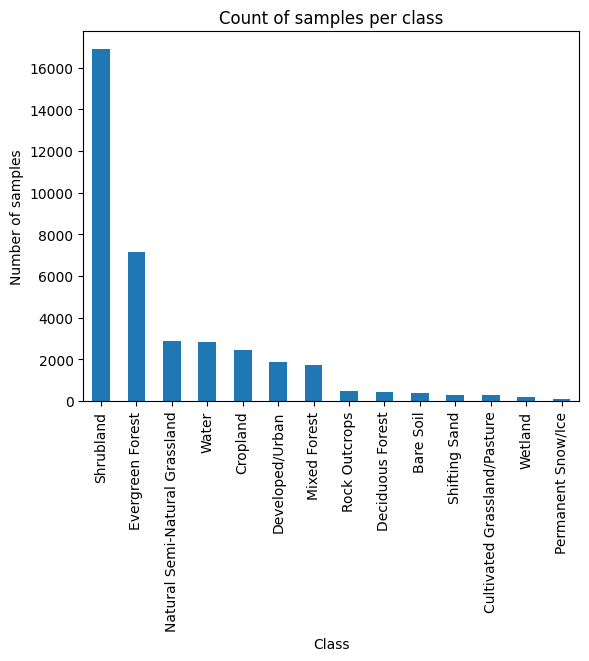

In [ ]:
# Count the number of rows for each class
class_counts = data['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Count of samples per class')
plt.show()

# Space-time overlay

### Import the data and configure the parameters

In [ ]:
# url part to complete the file path
base_path = "http://s3.opengeohub.org"
# GDAL settings
GDAL_OPTS = {'GDAL_HTTP_VERSION': '1.0', 'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': '.tif'}
max_ram_mb = 12000
n_threads = 8
url = "https://drive.google.com/file/d/1kERk0hFR1fV9BXLd3kr48XhJ7eoONtWm/view?usp=drive_link"
catalog_file = "catalog.csv"
gdown.download(url=url, output=catalog_file, fuzzy=True)
url = "https://drive.google.com/file/d/1-0QyZfYjHGhJOvUVZ84Nta6eip7yz-7E/view?usp=drive_link"
tiles_file = "ard2_final_status.gpkg"
gdown.download(url=url, output=tiles_file, fuzzy=True)

years = data['year'].unique().tolist()
years = [int(ii) for ii in years]

catalog = DataCatalog.create_catalog(catalog_def=catalog_file, years=years, base_path=base_path)

# Optional, only for visualization
catalog.save_json('catalog.json')

Downloading...
From: https://drive.google.com/uc?id=1kERk0hFR1fV9BXLd3kr48XhJ7eoONtWm
To: /content/catalog.csv
100%|██████████| 9.26k/9.26k [00:00<00:00, 6.21MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0QyZfYjHGhJOvUVZ84Nta6eip7yz-7E
To: /content/ard2_final_status.gpkg
100%|██████████| 4.70M/4.70M [00:00<00:00, 102MB/s]


### Overlay

In [ ]:
# Required to link scikit-map to the correct version of PROJ (adapt the path based on the used python version)
del os.environ['PROJ_LIB']
os.environ['PROJ_LIB'] = '/usr/local/lib/python3.12/dist-packages/rasterio/proj_data'
os.environ['PROJ_LIB']

'/usr/local/lib/python3.12/dist-packages/rasterio/proj_data'

In [ ]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
data = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

space_time_overlay = SpaceTimeOverlay(
        col_date='year',
        points=data,
        catalog=catalog,
        raster_tiles='ard2_final_status.gpkg',
        verbose=True,
        n_threads=n_threads,
        tile_id_col='TILE')
ovelayed_data = space_time_overlay.run(gdal_opts=GDAL_OPTS, max_ram_mb=max_ram_mb, out_file_name=f'ovelayed.pq')


[10:04:56] Overlay 338 points from 2000 in 85 raster layers
[10:04:56] Reading ard2_final_status.gpkg
[10:05:05] 0 out of 43 URLs returning 404
[10:05:05] Scanning blocks of 43 layers
[10:05:05] Finding query pixels for c92fa53512a0f1678e6d52bb22cf2fc1 (1 layers)
[10:05:10] Finding query pixels for e9fdf7117484c21721f875c1bc47fa61 (42 layers)
[10:05:10] Retrieving block information for 55 tiles.
[10:05:48] End
Dropping 0 points out of 338 because out of extent
[10:05:48] Overlay 340 points from 2001 in 85 raster layers
[10:05:48] Reading ard2_final_status.gpkg
[10:05:57] 0 out of 43 URLs returning 404
[10:07:20] Scanning blocks of 43 layers
[10:07:20] Finding query pixels for c92fa53512a0f1678e6d52bb22cf2fc1 (1 layers)
[10:07:24] Finding query pixels for e9fdf7117484c21721f875c1bc47fa61 (42 layers)
[10:07:24] Retrieving block information for 55 tiles.
[10:09:13] End
Dropping 0 points out of 340 because out of extent
[10:09:13] Overlay 343 points from 2002 in 85 raster layers
[10:09:13]

In [ ]:
url = "https://drive.google.com/file/d/15Zpw3WO9XFyGDPpZH5Z_1f4Md5Wnf3Oc/view?usp=drive_link"
overlayed_file = "ovelayed.pq"
gdown.download(url=url, output=overlayed_file, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=15Zpw3WO9XFyGDPpZH5Z_1f4Md5Wnf3Oc
To: /content/ovelayed.pq
100%|██████████| 3.98M/3.98M [00:00<00:00, 136MB/s]


'ovelayed.pq'

# Model preparation

### Prepare the training data
- read in the overlaid data
- fix covariate issues and split data-sets
   - Removes columns with >10% missing data.
   - Remove samples with remaining covariate covariates with the nan.
- encode classes


In [ ]:
ovelayed_data = pd.read_parquet('ovelayed.pq')
ovelayed_data

,dataset,id,original_class_1,original_class_2,class,year,lon,lat,swir1_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1,...,blue_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,thermal_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1,thermal_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY1101_YYYY1231_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1,nir_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1,legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130
0,GLanCE-999,01_06_02_999_850119_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2000,-123.987427,41.807136,35.0,15.0,...,10.0,184.00,184.0,163.0,162.0,19.0,19.0,160.0,38.75,4624.0
1,GLanCE-999,01_06_02_999_850117_1999_2018,Barren/sparsely vegetated,Rock,Rock Outcrops,2000,-123.834208,41.830604,50.0,24.0,...,20.0,183.25,185.0,159.0,151.0,31.0,31.0,155.0,58.50,6346.0
2,GLanCE-999,01_06_02_999_850099_1999_2018,Developed,Developed,Developed/Urban,2000,-123.348313,39.410231,44.0,27.0,...,12.0,187.25,190.0,149.0,145.0,28.0,32.0,146.0,41.00,4133.0
3,GLanCE-3,01_6_2_3_846753_1984_2018,Shrub,Shrub,Shrubland,2000,-123.148492,39.645515,41.0,20.0,...,7.0,185.25,187.0,165.0,163.0,20.0,25.0,164.0,41.25,6958.0
4,GLanCE-3,01_11_1_3_848977_1984_2018,Shrub,Shrub,Shrubland,2000,-123.108329,39.085947,38.0,23.0,...,4.0,184.00,184.0,162.0,167.0,22.0,19.0,164.0,44.25,8170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37892,GPW-train,789b0ff5f5c4eae1188f1ccf5979306d,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.376140,39.001396,97.0,32.0,...,10.0,187.00,189.0,158.0,163.0,55.0,36.0,157.0,62.00,1454.0
37893,GPW-train,a75cf55fb2f2c2e0e0287ca6f134d98d,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.005394,83.0,26.0,...,11.0,185.00,187.0,164.0,163.0,41.0,25.0,161.0,57.00,1229.0
37894,GPW-train,da8e9e3af928d8afd850b482089feae8,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.004894,77.0,25.0,...,9.0,185.00,186.0,163.0,162.0,40.0,28.0,160.0,48.25,1235.0
37895,GPW-train,249240f182973951367ec790d0451048,Cultivated grassland,,Cultivated Grassland/Pasture,2022,-123.374140,39.004395,63.0,28.0,...,7.0,185.00,186.0,167.0,168.0,30.0,26.0,166.0,47.50,1246.0


In [ ]:
from scipy.stats import randint, uniform
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
target_feature = 'class'
select_columns = (ovelayed_data.isna().sum() / len(ovelayed_data)) <= 0.1
df = ovelayed_data.loc[:,select_columns]
df = df.dropna()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Befrore dropping: {ovelayed_data.shape}")
print(f"After dropping: {df.shape}")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[target_feature])
target_feature_encoded = 'class_encoded'
df[target_feature_encoded] = y_encoded

mapping_df = pd.DataFrame({
    'Label': label_encoder.classes_,
    'Code': range(len(label_encoder.classes_))
})
fold_size = int(df.shape[0]/10)
features = list(catalog.get_feature_names())
df_cal = df[0:fold_size].copy()
df_test = df[1*fold_size:2*fold_size].copy()
df_train = df[2*fold_size:].copy()


Befrore dropping: (37897, 93)
After dropping: (35725, 93)


In [ ]:
df_cal

,dataset,id,original_class_1,original_class_2,class,year,lon,lat,swir1_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1,...,thermal_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1,thermal_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY1101_YYYY1231_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1,swir2_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1,ndti_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1,nir_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1,legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130,class_encoded
0,WorldCereal,2019Usda967427,Shrubland,,Shrubland,2019,-117.782377,34.680233,103.0,76.0,...,189.25,193.0,139.0,137.0,80.0,84.0,138.0,72.25,9105.0,11
1,WorldCereal,2019Usda839249,Shrubland,,Shrubland,2019,-117.275447,36.692960,69.0,63.0,...,196.25,197.0,129.0,130.0,61.0,65.0,129.0,51.00,803.0,11
2,GLanCE-2,01_10_2_2_850511_2005_2017,Barren/sparsely vegetated,Rock,Rock Outcrops,2005,-117.234944,35.934174,97.0,39.0,...,193.00,193.0,138.0,135.0,57.0,94.0,140.0,64.50,3162.0,9
3,GLanCE-999,01_10_02_999_850244_1999_2018,Barren/sparsely vegetated,Beach/Sand,Shifting Sand,2006,-115.064454,32.921797,115.0,112.0,...,192.00,192.0,128.0,128.0,115.0,113.0,127.0,97.00,871.0,10
4,WorldCereal,2019Usda642462,Evergreen forest,,Evergreen Forest,2019,-121.154444,39.466050,19.0,9.0,...,182.25,181.0,167.0,183.0,6.0,9.0,175.0,25.00,6245.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,GLanCE-3,01_10_2_3_848832_1984_2018,Shrub,Shrub,Shrubland,2017,-114.718165,34.356776,56.0,49.0,...,192.00,193.0,132.0,131.0,49.0,49.0,132.0,44.00,4725.0,11
3568,GLanCE-999,01_10_01_999_850566_1999_2010,Barren/sparsely vegetated,Rock,Rock Outcrops,2005,-118.867117,37.692126,121.0,50.0,...,183.00,183.0,148.0,150.0,93.0,85.0,146.0,144.50,22283.0,9
3569,WorldCereal,2019Usda733166,Shrubland,,Shrubland,2019,-120.419158,38.258414,40.0,15.0,...,184.00,184.0,156.0,175.0,19.0,19.0,164.0,40.00,8936.0,11
3570,WorldCereal,2019Usda600067,Shrubland,,Shrubland,2019,-122.570048,40.002777,42.0,27.0,...,187.25,190.0,160.0,162.0,25.0,25.0,161.0,37.50,2750.0,11


### Feature selection via Recursive Feature Elimination
   

In [ ]:
rfe_step = int(len(features) * 0.05)
n_features_to_select = 30
print(f"Finding the best {n_features_to_select} features using RFE (step={rfe_step})")
rfe = RFE(estimator=RandomForestClassifier(n_jobs=50, criterion='log_loss', random_state=42),
          step=rfe_step, n_features_to_select=n_features_to_select, verbose=1)
rfe.fit(df_cal[features], df_cal[target_feature_encoded])
features_sel = [s for s, m in zip(features, rfe.support_) if m]
features_sel

Finding the best 30 features using RFE (step=4)
Fitting estimator with 85 features.
Fitting estimator with 81 features.
Fitting estimator with 77 features.
Fitting estimator with 73 features.
Fitting estimator with 69 features.
Fitting estimator with 65 features.
Fitting estimator with 61 features.
Fitting estimator with 57 features.
Fitting estimator with 53 features.
Fitting estimator with 49 features.
Fitting estimator with 45 features.
Fitting estimator with 41 features.
Fitting estimator with 37 features.
Fitting estimator with 33 features.


['green_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'red_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130',
 'red_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndvi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'savi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'swir2_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'green_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'ndwi_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'ndvi_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1',
 'blue_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'swir2_glad.s

In [ ]:
# To be consistent with the trained model
features_sel = ['ndsi_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1',
 'ndwi_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'swir1_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'thermal_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'blue_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndwi_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1',
 'swir1_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndvi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'red_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'swir1_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_m_30m_s_YYYY0301_YYYY0430_go_epsg.4326_v1',
 'legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130',
 'savi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'red_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'swir2_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'green_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndvi_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndsi_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'swir1_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'nir_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'swir2_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'ndti_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndwi_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'swir2_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'ndvi_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1']

### Hyperparameter tuning


In [ ]:
lgb_param_distributions = {
        'objective': ['multiclass'],
        'metric': ['multi_logloss'],
        'num_class': [df[target_feature_encoded].nunique()],
        'boosting_type': ['gbdt'],
        'num_leaves': randint(50, 200),
        'max_depth': randint(3, 15),
        'n_estimators': [1000],
        'learning_rate': uniform(loc=1e-3, scale=0.1),
        'min_data_in_leaf': randint(20, 100),
        'early_stopping_rounds' : [20],
        'early_stopping_min_delta': [0.01],
        'data_sample_strategy': ['bagging'],
        'max_bin': [512],
        'lambda_l1': uniform(loc=1., scale=10.),
        'lambda_l2': uniform(loc=1., scale=10.),
        'min_gain_to_split': uniform(loc=0., scale=1.),
        'num_threads': [-1],
        'verbose': [-1]
    }

def lgb_hyper_parameter_tunning(data, data_eval, covs, target_column,
  lgb_estimator, param_distributions, eval_metric, cv, seed = 42):

    min_resources = int(data.shape[0]*0.05) #500
    if min_resources <= 5:
        min_resources = int(data.shape[0]*0.5)

    max_resources = data.shape[0]
    factor = 1.5
    n_samples = data.shape[0]
    n_groups = 6
    base_size = n_samples // n_groups
    remainder = n_samples % n_groups
    group = [base_size + 1 if i < remainder else base_size for i in range(n_groups)]
    group = np.array(group)
    group_vec = []
    for group_id in range(n_groups):
        size = base_size + 1 if group_id < remainder else base_size
        group_vec.extend([group_id] * size)

    group_vec = np.array(group_vec)

    print(f"Finding the best hyper-parameters using HalvingRandomSearchCV ({min_resources}--{max_resources} factor={factor})")

    hyperpar_lgb = HalvingRandomSearchCV(
            estimator = lgb_estimator(),
            param_distributions = param_distributions,
            factor = factor,
            verbose = 1,
            min_resources = min_resources,
            max_resources = max_resources,
            cv = cv,
            random_state=seed
    )

    hyperpar_lgb.fit(data[covs], data[target_column], groups=group_vec,
                     eval_set = [(data_eval[covs], data_eval[target_column])],
                     eval_metric = eval_metric)

    print(hyperpar_lgb.best_score_, hyperpar_lgb.best_params_)
    print(f'Best score: {hyperpar_lgb.best_score_}')
    print(f'Best hyper-parameters:\n{hyperpar_lgb.best_params_}')

    best_lgb = lgb_estimator(verbosity = 2, **hyperpar_lgb.best_params_)
    best_lgb.fit(data[covs],    data[target_column],
                    eval_set = [(data_eval[covs], data_eval[target_column])],
                    eval_metric = eval_metric)

    best_params = hyperpar_lgb.best_params_
    best_params['n_estimators'] = best_lgb.booster_.current_iteration()

    print(f'Optimized n_estimators: {best_params["n_estimators"]}')

    del best_params['early_stopping_min_delta']
    del best_params['early_stopping_rounds']
    del best_params['metric']

    return best_params
from sklearn.model_selection import GroupKFold
best_params =  lgb_hyper_parameter_tunning(
          data = df_train,
          data_eval = df_cal,
          covs = features_sel,
          target_column = target_feature_encoded,
          lgb_estimator = lgb.LGBMClassifier,
          param_distributions = lgb_param_distributions,
          eval_metric = 'multi_logloss',
          cv = GroupKFold(5),
          seed = 42
        )

In [ ]:
# Output of the previously trained model
best_params = {'boosting_type': 'gbdt',
 'data_sample_strategy': 'bagging',
 'lambda_l1': 1.7455064367977082,
 'lambda_l2': 10.868869366005173,
 'learning_rate': 0.07822447692966575,
 'max_bin': 512,
 'max_depth': 14,
 'min_data_in_leaf': 27,
 'min_gain_to_split': 0.005522117123602399,
 'n_estimators': 143,
 'num_class': 14,
 'num_leaves': 188,
 'num_threads': -1,
 'objective': 'multiclass',
 'verbose': -1}


### Evaluate prediction accuracy


In [ ]:
X_train = df_train[features_sel].copy()
y_train = df_train[target_feature_encoded].copy()
lgb_traing = lgb.Dataset(X_train, label=y_train)
best_params_train = best_params.copy()
del best_params_train['n_estimators']
final_model = lgb.train(
    best_params_train,
    lgb_traing,
);


X_test = df_test[features_sel].copy()
y_test = df_test[target_feature_encoded].copy()

# Optimized n_estimators: 143

y_pred_test = final_model.predict(X_test, num_iteration=143)
y_pred_test = np.argmax(y_pred_test, axis=1) # from probabilities to hard class

print(classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68        36
           1       0.90      0.85      0.87       247
           2       0.96      0.96      0.96        23
           3       0.52      0.38      0.44        37
           4       0.92      0.91      0.92       186
           5       0.76      0.76      0.76       673
           6       0.60      0.40      0.48       191
           7       0.96      0.97      0.96       303
           8       1.00      0.50      0.67         8
           9       0.96      0.76      0.85        33
          10       0.93      0.93      0.93        29
          11       0.84      0.90      0.87      1703
          12       0.86      0.87      0.86        89
          13       1.00      0.29      0.44        14

    accuracy                           0.84      3572
   macro avg       0.86      0.72      0.76      3572
weighted avg       0.83      0.84      0.83      3572



In [ ]:
import joblib
joblib.dump(final_model, "final_model.joblib")

['final_model.joblib']

In [ ]:
# Check for overfitting
y_pred_train = final_model.predict(X_train, num_iteration=143)
y_pred_train = np.argmax(y_pred_train, axis=1)

print(classification_report(y_train, y_pred_train, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       315
           1       0.98      0.97      0.97      1924
           2       1.00      0.98      0.99       232
           3       0.99      0.79      0.88       373
           4       0.98      0.99      0.98      1472
           5       0.92      0.93      0.92      5738
           6       0.95      0.82      0.88      1373
           7       1.00      1.00      1.00      2273
           8       0.97      0.87      0.92        70
           9       1.00      0.96      0.98       379
          10       0.99      0.99      0.99       229
          11       0.94      0.97      0.96     13511
          12       0.96      0.92      0.94       594
          13       1.00      0.89      0.94        98

    accuracy                           0.95     28581
   macro avg       0.97      0.93      0.95     28581
weighted avg       0.95      0.95      0.95     28581



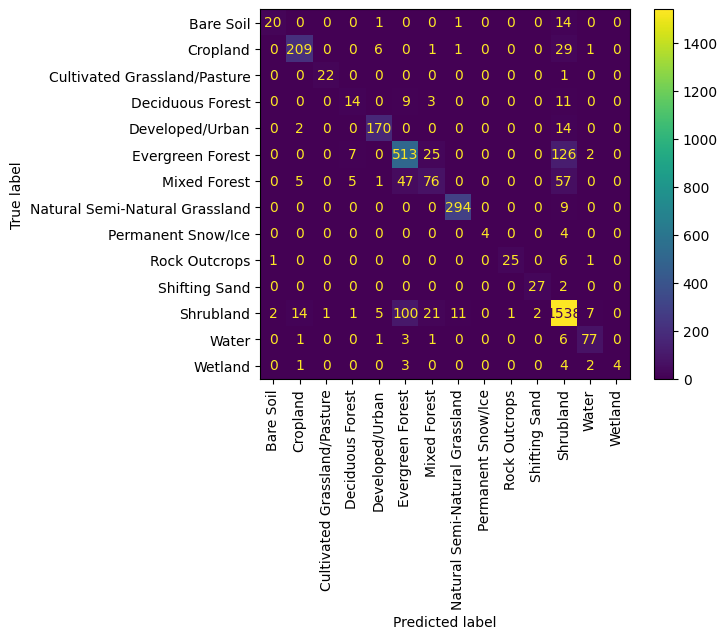

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=range(len(label_encoder.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(label_encoder.classes_))
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
import numpy as np

feature_importances = final_model.feature_importance(importance_type='split')
feature_names = final_model.feature_name()

# Normalize to sum to 1
feature_importances = feature_importances / np.sum(feature_importances)

for f, im in sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True):
    print(f'{f}: {im:.4f}')


legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130: 0.1278
ndti_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0625
thermal_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0571
ndwi_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1: 0.0545
ndvi_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0461
ndsi_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1: 0.0441
ndwi_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1: 0.0404
nir_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1: 0.0375
ndvi_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1: 0.0361
ndsi_glad.swa.ard2_m_30m_s_YYYY0301_YYYY0430_go_epsg.4326_v1: 0.0359
ndsi_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0346
swir1_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0327
swir1_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1: 0.0325
swir2_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1: 0.0304
ndwi_glad.swa.ard

# Tiled predictions for large scale mapping

In [ ]:
! pip install tl2cgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.8/774.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
import gdown
tiles_california = ['120W_33N', '115W_35N', '121W_36N', '119W_33N', '115W_36N', '120W_36N', '117W_35N', '114W_34N', '115W_32N', '124W_40N', '116W_32N', '121W_35N', '123W_39N', '123W_40N', '119W_37N', '120W_39N', '122W_39N', '117W_34N', '116W_34N', '120W_37N', '117W_32N', '118W_35N', '118W_33N', '116W_35N', '122W_40N', '119W_34N', '119W_35N', '121W_40N', '122W_37N', '121W_39N', '121W_37N', '115W_34N', '123W_41N', '123W_38N', '117W_36N', '114W_33N', '120W_34N', '114W_35N', '122W_38N', '122W_36N', '119W_36N', '122W_41N', '118W_36N', '114W_32N', '118W_38N', '117W_37N', '120W_41N', '120W_40N', '121W_38N', '120W_35N', '118W_32N', '118W_34N', '116W_33N', '119W_38N', '120W_38N', '117W_33N', '118W_37N', '121W_41N', '124W_41N', '115W_33N', '116W_36N']
url = "https://drive.google.com/file/d/1q9ehcO9a_n2Apegu1356So7gxNAk4h5x/view?usp=drive_link"
final_model_file = "final_model.joblib"
gdown.download(url=url, output=final_model_file, fuzzy=True)
url = "https://drive.google.com/file/d/1-d1UaTMUJSRhSTF0QlQBzmD8V45xqp3f/view?usp=drive_link"
LEGEND_PATH = "mapping.json"
gdown.download(url=url, output=LEGEND_PATH, fuzzy=True)
url = "https://drive.google.com/file/d/1kERk0hFR1fV9BXLd3kr48XhJ7eoONtWm/view?usp=drive_link"
catalog_file = "catalog.csv"
gdown.download(url=url, output=catalog_file, fuzzy=True)
url = "https://drive.google.com/file/d/1-0QyZfYjHGhJOvUVZ84Nta6eip7yz-7E/view?usp=drive_link"
tiles_file = "ard2_final_status.gpkg"
gdown.download(url=url, output=tiles_file, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1q9ehcO9a_n2Apegu1356So7gxNAk4h5x
To: /content/final_model.joblib
100%|██████████| 9.44M/9.44M [00:00<00:00, 36.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-d1UaTMUJSRhSTF0QlQBzmD8V45xqp3f
To: /content/mapping.json
100%|██████████| 359/359 [00:00<00:00, 505kB/s]
Downloading...
From: https://drive.google.com/uc?id=1kERk0hFR1fV9BXLd3kr48XhJ7eoONtWm
To: /content/catalog.csv
100%|██████████| 9.26k/9.26k [00:00<00:00, 11.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0QyZfYjHGhJOvUVZ84Nta6eip7yz-7E
To: /content/ard2_final_status.gpkg
100%|██████████| 4.70M/4.70M [00:00<00:00, 148MB/s]


'ard2_final_status.gpkg'

In [ ]:
from skmap.modeler import RFClassifier
from skmap.catalog import DataCatalog
from skmap.tiled_data import TiledData, TiledDataLoader, TiledDataExporter
from skmap.misc import TimeTracker, ttprint, sb_arr
import skmap_bindings as sb
import sys, os, warnings, json
import numpy as np
warnings.filterwarnings("ignore", module="sklearn")
import time
import gc
warnings.filterwarnings("ignore", category=UserWarning, module="treelite")

################
# Input params #
################

base_path = "http://s3.opengeohub.org"
catalog_file = "/content/catalog.csv"

SPATIAL_AGGREGATION = None
OUT_FILES_SUFFIX = f'g_epsg.4326_v1'
OUT_FILES_PREFIX = "lclu.california"
TIME_FRAME = "20000101_20221231"
LEGEND_PATH = '/content/mapping.json'
if False:
    mapping_dict = dict(zip(mapping_df.iloc[:, 1], mapping_df.iloc[:, 0]))
    with open(LEGEND_PATH, 'w') as f:
        json.dump(mapping_dict, f, indent=2)
MASK_TEMPLATE_PATH =  base_path + "/global/tiled.masks/mask_landsat_glad.lc.landmask_glc.desert.ice/{tile_id}.tif"
RESAMPLING_STRATEGY = "GRA_CubicSpline"
CONVERT_NAN_TO_NUM = True
GDAL_OPTS = {'GDAL_HTTP_VERSION': '1.0', 'CPL_VSIL_CURL_ALLOWED_EXTENSIONS': '.tif'}
THREADS = 96

tile_ids = tiles_california[0:1]
with open(LEGEND_PATH, 'r') as file:
    legend = json.load(file)
n_class = len(legend)
spatial_res = f'{30*SPATIAL_AGGREGATION}m' if SPATIAL_AGGREGATION else '30m'
base_dir = f'.'

model_lgbm = RFClassifier(model_path='/content/final_model.joblib', n_class=n_class)

catalog = DataCatalog.create_catalog(catalog_def=catalog_file, years=range(2000,2001), base_path=base_path)
catalog.query(list(set(model_lgbm.model_covs)))
assert len(catalog.get_otf_idx()) == 0, "On the fly layers are present but not expected"

covs_data = TiledDataLoader(
    catalog=catalog,
    mask_template_path=MASK_TEMPLATE_PATH,
    spatial_aggregation=SPATIAL_AGGREGATION,
    resampling_strategy=RESAMPLING_STRATEGY,
    verbose=True
)

export_data_probs = TiledDataExporter(spatial_res=spatial_res, mode='probabilities', legend=legend)
export_data_class = TiledDataExporter(spatial_res=spatial_res, mode='dominant_class')

In [ ]:
catalog.get_feature_names()

{'blue_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY0301_YYYY0430_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'blue_glad.swa.ard2_m_30m_s_YYYY1101_YYYY1231_go_epsg.4326_v1',
 'blue_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0101_YYYY0228_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0301_YYYY0430_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0501_YYYY0630_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0701_YYYY0831_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY0901_YYYY1031_go_epsg.4326_v1',
 'green_glad.swa.ard2_m_30m_s_YYYY1101_YYYY1231_go_epsg.4326_v1',
 'green_glad.swa.ard2_p25_30m_s_YYYY0101_YYYY1231_go_epsg.4326_v1',
 'legendtm_rf_30m_m_s_20000101_20231231_go_epsg.4326_v20250130',
 'ndsi_glad.sw

In [ ]:

for tile_id in tile_ids[0:1]:
    print("--------------------------------------------------------------")

    export_data_probs.tile_id = tile_id
    export_data_class.tile_id = tile_id

    with TimeTracker(f" # Processing tile {tile_id}", False):

        with TimeTracker(f" o Reading data for tile {tile_id}", False):
            # Read the data, warp to target CRS and mask non preditcted pixels
            covs_data.load_tile_data(tile_id)
            if covs_data.n_pixels_valid == 0:
                ttprint("No pixels to predict in this tile, skipping")
                continue
            # Fill eventual missing values
            covs_data.convert_nan_to_median()
            covs_data.convert_nan_to_value(0.0)

        with TimeTracker(f" o Predicting tile {tile_id}", False):
            export_data_probs.array = model_lgbm.predict(covs_data).array

        with TimeTracker(f" o Exporting files", False):
            # Fit probabilities in integer to the target scaling and get dominant class
            with TimeTracker(f"   Fit probabilities {tile_id}", False):
                export_data_class.array = export_data_probs.fit_probabilities(export_data_probs.array, input_scaling=1., target_scaling=100)
            export_data_probs.export_files(OUT_FILES_PREFIX + ".{CLASS}", OUT_FILES_SUFFIX,
                                         255, covs_data.mask_path,
                                         'byte', covs_data.get_pixels_valid_idx(1),
                                         write_folder=base_dir, scaling_metadata=1/100., timeframe=TIME_FRAME)
            export_data_class.export_files(OUT_FILES_PREFIX, OUT_FILES_SUFFIX,
                                         32767, covs_data.mask_path,
                                         'uint16', covs_data.get_pixels_valid_idx(1),
                                         write_folder=base_dir, scaling=1, timeframe=TIME_FRAME)

        covs_data.__exit__(None,None,None)
    print("--------------------------------------------------------------")


--------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


[11:01:59]    Prepare mask for tile 120W_33N: 1.02 secs
[11:03:22]    Read rasters and compute whales for tile 120W_33N: 83.01 secs
